<a href="https://colab.research.google.com/github/SeniyaSultan/lastic_Pollution_Classification2/blob/main/lastic_Pollution_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_classif


In [ ]:
!pip install gdown


In [ ]:
import gdown

# File ID from your Google Drive link
file_id = "1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "plastic_data.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd
To: /content/plastic_data.csv
100%|██████████| 11.0k/11.0k [00:00<00:00, 10.9MB/s]


'plastic_data.csv'

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("plastic_data.csv")

# Display first few rows
df.head()


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows with missing values
df_clean = df.dropna()

# Check for relevant columns
print(df_clean.columns)


Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


In [ ]:
# Create new label column: 0 = High contributor, 1 = Low contributor
df_clean['plastic_contribution'] = df_clean['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > 6008 else 1)


In [ ]:
print(df_clean.columns.tolist())


['Country or Administrative area', 'Area [km2]', 'Coast length [km]', 'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]', 'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)', 'Ratio Me/MPW', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'plastic_contribution']


In [ ]:
print("Shape of df_clean:", df_clean.shape)
print("Shape of features:", features.shape)


Shape of df_clean: (0, 15)
Shape of features: (0, 9)


In [ ]:
print(df_clean.columns)


Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW'],
      dtype='object')


In [ ]:
# Convert the 'M[E] (metric tons year -1)' column to numeric (force errors to NaN)
df_clean['M[E] (metric tons year -1)'] = pd.to_numeric(df_clean['M[E] (metric tons year -1)'], errors='coerce')

# Now safely create the label column
df_clean['plastic_contribution'] = df_clean['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > 6008 else 1)


In [ ]:
# Step 1: Drop unnecessary columns
df_clean = df.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

# Step 2: Fill missing values with column means
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

# Step 3: Convert plastic metric column to numeric
df_clean['M[E] (metric tons year -1)'] = pd.to_numeric(df_clean['M[E] (metric tons year -1)'], errors='coerce')

# Step 4: Create classification label
df_clean['plastic_contribution'] = df_clean['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > 6008 else 1)

# Step 5: Check if it worked
print(df_clean[['M[E] (metric tons year -1)', 'plastic_contribution']].head())


   M[E] (metric tons year -1)  plastic_contribution
0                         NaN                     1
1                         NaN                     1
2                       860.0                     1
3                         2.0                     1
4                         NaN                     1


In [ ]:
# Remove apostrophes from all columns, and convert to numeric where possible
for col in X.columns:
    X[col] = X[col].astype(str).str.replace("'", "")  # remove apostrophes
    X[col] = pd.to_numeric(X[col], errors='coerce')   # convert to numbers


In [ ]:
# Fill any remaining NaNs with column means
X = X.fillna(X.mean(numeric_only=True))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# y is the target column (labels)
y = df_clean['plastic_contribution']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

# After train-test split, check columns with all NaNs in X_train
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Find columns with all NaNs in train
cols_all_nan = X_train_df.columns[X_train_df.isna().all()]
print("Columns with all NaNs in training data:", cols_all_nan.tolist())

# Drop those columns from train and test
X_train_df = X_train_df.drop(columns=cols_all_nan)
X_test_df = pd.DataFrame(X_test, columns=X.columns).drop(columns=cols_all_nan)

# Convert back to numpy arrays
X_train = X_train_df.values
X_test = X_test_df.values


Columns with all NaNs in training data: ['P[E] [%]', 'Ratio Me/MPW']


In [ ]:
print("Unique classes in y_train:", np.unique(y_train, return_counts=True))


Unique classes in y_train: (array([1]), array([132]))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
import numpy as np
print("Classes in y_train:", np.unique(y_train, return_counts=True))
print("Classes in y_test:", np.unique(y_test, return_counts=True))


Classes in y_train: (array([1]), array([132]))
Classes in y_test: (array([1]), array([33]))


In [ ]:
# Remove apostrophes and other non-numeric characters, then convert to numeric
df['M[E] (metric tons year -1)'] = df['M[E] (metric tons year -1)'].astype(str).str.replace("'", "").str.strip()

# Convert to numeric, coercing errors to NaN
df['M[E] (metric tons year -1)'] = pd.to_numeric(df['M[E] (metric tons year -1)'], errors='coerce')


In [ ]:
print(df['M[E] (metric tons year -1)'].describe())
print("Count of values > 6008:", (df['M[E] (metric tons year -1)'] > 6008).sum())
print("Count of values <= 6008:", (df['M[E] (metric tons year -1)'] <= 6008).sum())


count       163.000000
mean       6008.944785
std       30954.200425
min           0.000000
25%           8.000000
50%         235.000000
75%        1515.000000
max      356371.000000
Name: M[E] (metric tons year -1), dtype: float64
Count of values > 6008: 16
Count of values <= 6008: 147


In [ ]:
threshold = df['M[E] (metric tons year -1)'].quantile(0.75)
print(f"Using threshold at 75th percentile: {threshold}")

df['plastic_contribution'] = df['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > threshold else 1)

print(df['plastic_contribution'].value_counts())


Using threshold at 75th percentile: 1515.0
plastic_contribution
1    124
0     41
Name: count, dtype: int64


In [ ]:
print(df_clean['plastic_contribution'].value_counts())


plastic_contribution
1    165
Name: count, dtype: int64


In [ ]:
threshold = df_clean['M[E] (metric tons year -1)'].quantile(0.75)
df_clean['plastic_contribution'] = df_clean['M[E] (metric tons year -1)'].apply(lambda x: 0 if x > threshold else 1)

print(df_clean['plastic_contribution'].value_counts())


plastic_contribution
1    135
0     30
Name: count, dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [5 8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
X_test_imputed = imputer.transform(X_test)  # Use the same imputer instance!


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [5 8]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
y_pred = model.predict(X_test_imputed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7878787878787878
Precision: 0.8125
Recall: 0.9629629629629629

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      0.96      0.88        27

    accuracy                           0.79        33
   macro avg       0.41      0.48      0.44        33
weighted avg       0.66      0.79      0.72        33



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df_clean['plastic_contribution'], test_size=0.2, random_state=42, stratify=df_clean['plastic_contribution']
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_imputed, y_train)  # Train the model first

y_pred = model.predict(X_test_imputed)  # Then predict


In [ ]:
# For example, if you dropped columns with all NaNs like this:
X_df = X.copy()  # X is your features DataFrame before scaling/imputation
cols_all_nan = X_df.columns[X_df.isna().all()]
X_df = X_df.drop(columns=cols_all_nan)

# Now your final features are:
final_feature_names = X_df.columns.tolist()


In [ ]:
X_train_df = pd.DataFrame(X_train_imputed, columns=final_feature_names)


In [ ]:
import pandas as pd

# Assuming 'X' is your original features DataFrame before scaling/imputation
cols_all_nan = X.columns[X.isna().all()]
X_clean = X.drop(columns=cols_all_nan)

# Then use X_clean to train your model


In [ ]:
feature_names = X_clean.columns


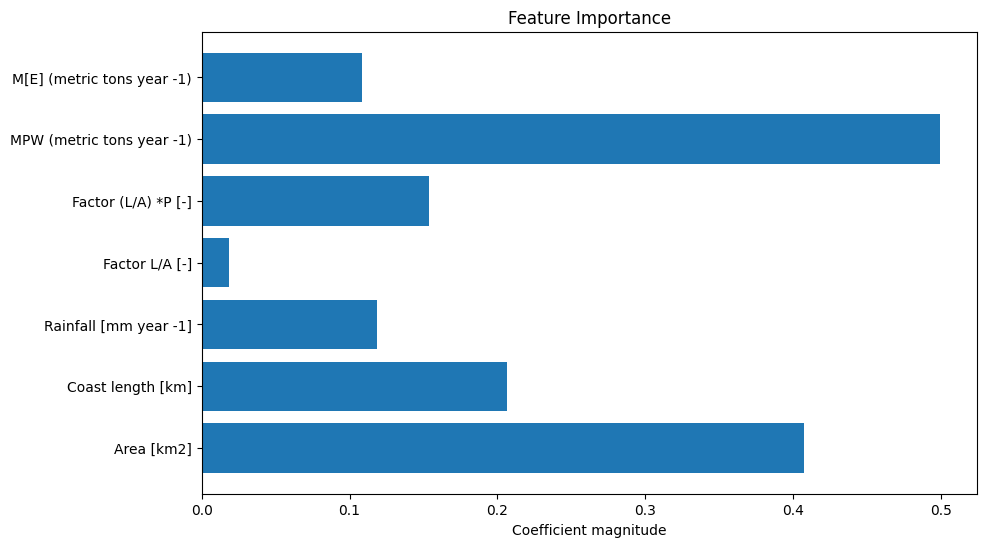

In [ ]:
coefficients = model.coef_[0]
plt.figure(figsize=(10,6))
plt.barh(feature_names, abs(coefficients))
plt.xlabel('Coefficient magnitude')
plt.title('Feature Importance')
plt.show()
